# Librerías

In [1]:
#Importamos las liberías que usaremos a lo largo de todo el trabajo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importamos librerias de LR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


# Dataset

Introducción:
El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas. 

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

A continuación cargamos el dataset y comenzamos a realizar un análisis explotario de los datos que en el se encuentran.


In [2]:
### Cargamos los datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
data = pd.read_csv(file_path, sep=',',engine='python')

In [3]:
### Vista de datos
data.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

In [4]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

Tenemos 18 variables numéricas (enteros y flotantes) y 7 variables que son de tipo objeto, lo cual significa significa que puede contener cualquier tipo de objeto en Python, ya sea un entero, una cadena, una lista, una función, una clase, o cualquier otro objeto. Estas variables que las consideramos categóricas las trabajaremos más adelante

## Análisis exploratorio de los datos

In [6]:
data.describe().round(2)

Unnamed: 0   MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  \
count   145412.00  143928.0  144159.00  142152.00     82658.00  75616.00   
mean     72728.18      12.2      23.22       2.36         5.47      7.61   
std      41990.72       6.4       7.12       8.48         4.19      3.79   
min          0.00      -8.5      -4.80       0.00         0.00      0.00   
25%      36362.75       7.6      17.90       0.00         2.60      4.80   
50%      72727.50      12.0      22.60       0.00         4.80      8.40   
75%     109093.25      16.9      28.20       0.80         7.40     10.60   
max     145458.00      33.9      48.10     371.00       145.00     14.50   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count      135159.00     143645.00     142351.00    142759.00    140907.00   
mean           40.04         14.04         18.66        68.88        51.54   
std            13.61          8.92          8.81        19.03        20.80   
min             6.00          0.00          0.00         0.00         0.00   
25%            31.00          7.00         13.00        57.00        37.00   
50%            39.00         13.00         19.00        70.00        52.00   
75%            48.00         19.00         24.00        83.00        66.00   
max           135.00        130.00         87.00       100.00       100.00   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  \
count    130351.00    130388.00  89542.00  86076.00  143646.00  141805.00   
mean       1017.65      1015.26      4.45      4.51      16.99      21.69   
std           7.11         7.04      2.89      2.72       6.49       6.94   
min         980.50       977.10      0.00      0.00      -7.20      -5.40   
25%        1012.90      1010.40      1.00      2.00      12.30      16.60   
50%        1017.60      1015.20      5.00      5.00      16.70      21.10   
75%        1022.40      1020.00      7.00      7.00      21.60      26.40   
max        1041.00      1039.60      9.00      9.00      40.20      46.70   

       RainfallTomorrow  
count         142153.00  
mean               2.36  
std                8.48  
min                0.00  
25%                0.00  
50%                0.00  
75%                0.80  
max              371.00

En esta tabla podemos ver:
- count: cantidad todal de datos
- mean: media/promedio
- std: desvio estándar
- min: valor mínimo de los datos
- máx: valor máximo de los datos
- 25%: es el primer cuartil
- 50%: es el segundo cuartil o mediana
- 75% es el tercer cuartil
- max: es el valor máximo de los datos


In [7]:
### Cantidad de valores faltantes.
data.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [8]:
#Otra forma de obtener la cantidad de datos nulos
data.isnull().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

Para analizar en profundidad y tratar los nulos solo vamos a tranajar con las cinco 'Locations' requeridas, que son:
- Sydney
- SydneyAirport
- Canberra
- Melbourne
- MelbourneAirport 

In [9]:
#¿Que 'Locations' posee el data set?
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
#Nos quemos con los datos de las 5 locations que nos interesan
data['Flag'] = data['Location'].apply(lambda x: 'si' if x in ["Sydney", "SydneyAirport", "Canberra", "Melbourne", "MelbourneAirport"] else 'no')

In [11]:
mask = data['Flag'] == "si"

#Ahora en data nos queda el dataset solo con los datos requeridos
data = data[mask]

In [12]:
#Visualización del nuevo dataset
data.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  \
30167       30176  2008-02-01   Sydney     19.5     22.4      15.6   
30168       30177  2008-02-02   Sydney     19.5     25.6       6.0   
30169       30178  2008-02-03   Sydney     21.6     24.5       6.6   
30170       30179  2008-02-04   Sydney     20.2     22.8      18.8   
30171       30180  2008-02-05   Sydney     19.7     25.7      77.4   

       Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Pressure9am  \
30167          6.2       0.0         NaN            NaN  ...      1017.6   
30168          3.4       2.7         NaN            NaN  ...      1017.9   
30169          2.4       0.1         NaN            NaN  ...      1016.7   
30170          2.2       0.0         NaN            NaN  ...      1014.2   
30171          NaN       0.0         NaN            NaN  ...      1008.3   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
30167      1017.4       8.0       8.0     20.7     20.9        Yes   
30168      1016.4       7.0       7.0     22.4     24.8        Yes   
30169      1015.6       7.0       8.0     23.5     23.0        Yes   
30170      1011.8       8.0       8.0     21.4     20.9        Yes   
30171      1004.8       8.0       8.0     22.5     25.5        Yes   

       RainTomorrow  RainfallTomorrow  Flag  
30167           Yes               6.0    si  
30168           Yes               6.6    si  
30169           Yes              18.8    si  
30170           Yes              77.4    si  
30171           Yes               1.6    si  

[5 rows x 26 columns]

In [13]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= data.value_counts('Location')

data_country.head()

Location
Canberra            3435
Sydney              3343
Melbourne           3192
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64

Realizamos un gráfico para observar la frecuencia de cada Location

<Axes: xlabel='Location'>

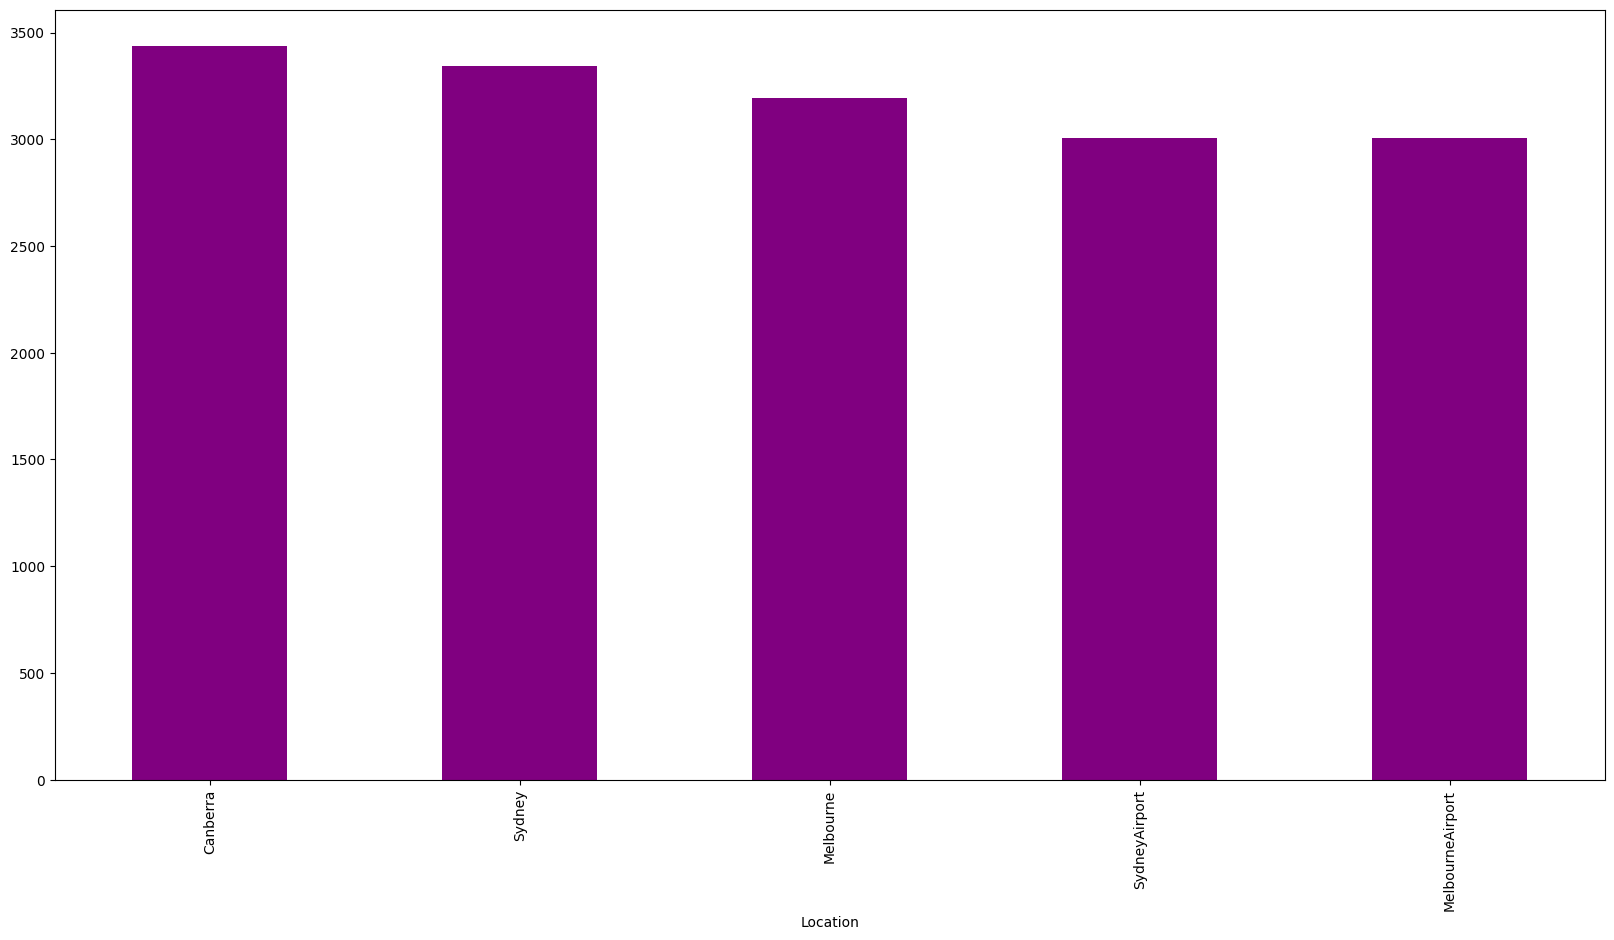

In [14]:

top = data['Location'].value_counts().sort_values(ascending=False)[0:30]

top.plot(kind='bar', color = 'purple', figsize=(20, 10))

C:\Users\garci\AppData\Local\Temp\ipykernel_19928\780170622.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)


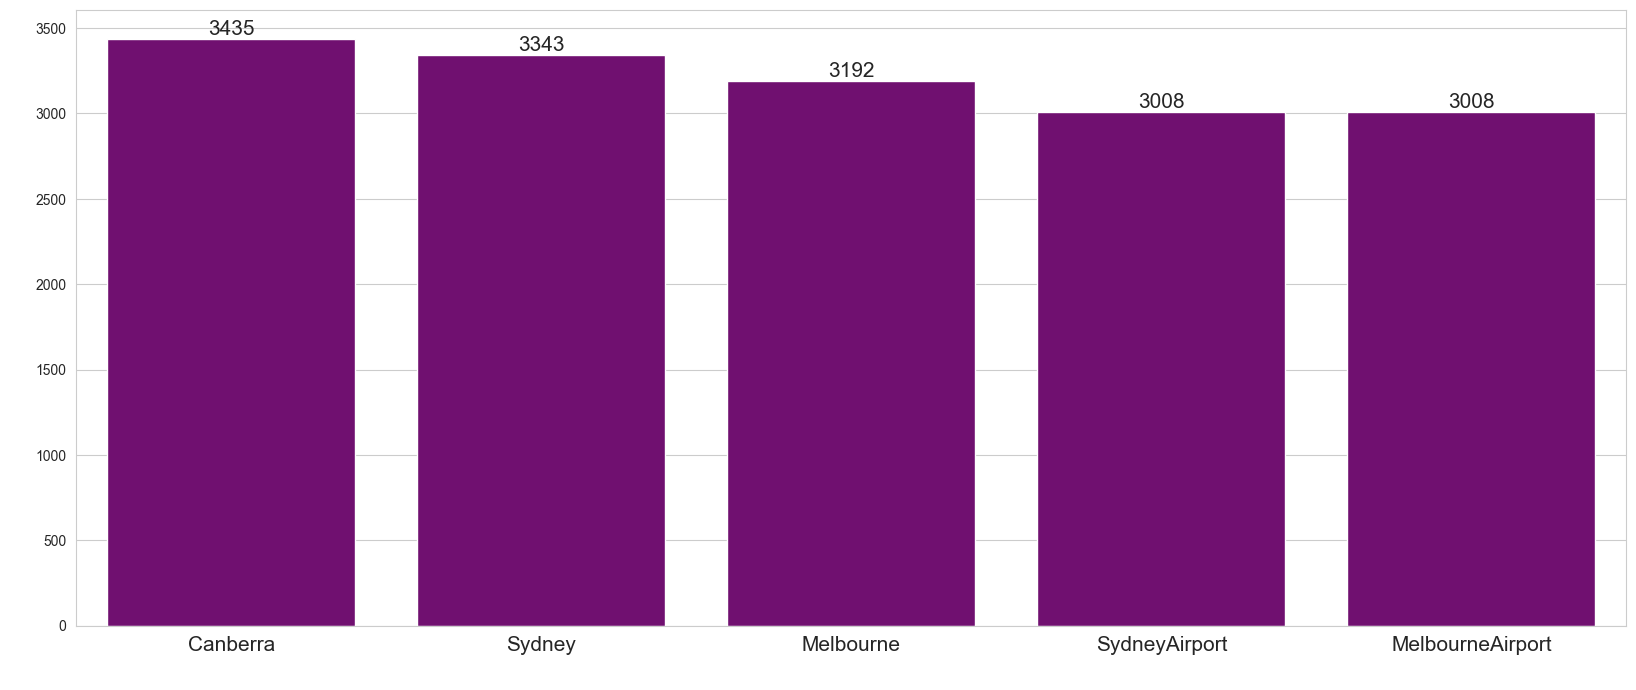

In [15]:
#Mejoramos el gráfico anterior para que se muestren los valores de frencuencia sobre cada columna 
top = data['Location'].value_counts().sort_values(ascending=False)[0:30]

#Configuramos el estilo de Seaborn (opcional)
sns.set_style("whitegrid")

#Creamos el gráfico de barras 
plt.figure(figsize=(20, 8))

ax = sns.barplot(x=top.index, y=top.values, color='purple')

#Aumentamos el tamaño de fuente de los ticks en el eje x
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

#Agregamos etiquetas de datos en las columnas
for i, v in enumerate(top.values):
    ax.text(i, v, str(v), fontsize=15, ha='center', va='bottom')

#Aumentamos el tamaño de fuente de las etiquetas de los ejes x e y
ax.set_xlabel(' ', fontsize=16)
ax.set_ylabel(' ', fontsize=16)

#Rotamos las etiquetas del eje x para una mejor visualización (opcional)

plt.xticks(rotation=0)

plt.show()


In [16]:
#Ahora que el data set es más chico, ya que nos quedamos solo con las columnas que necesitamos
print('Cantidad de filas del data set:', data.shape[0])


Cantidad de filas del data set: 15986


In [17]:
#Calculamos la cantidad de valores nulos
nulos_por_columna = data.isnull().sum()

#Acomodamos los datos para poder ponerle titulo a las dos columnas que nos devuelve data.isnull().sum
nombres_columnas = ['Nombre_Columna', 'Cantidad_Nulos']  
nulos_con_nombres = pd.DataFrame({'Nombre_Columna': nulos_por_columna.index, 'Cantidad_Nulos': nulos_por_columna.values})

print('Cantidad de nulos por columna')
print(nulos_con_nombres)


Cantidad de nulos por columna
      Nombre_Columna  Cantidad_Nulos
0         Unnamed: 0               0
1               Date               0
2           Location               0
3            MinTemp             491
4            MaxTemp             486
5           Rainfall             787
6        Evaporation            1706
7           Sunshine            1948
8        WindGustDir            1457
9      WindGustSpeed            1455
10        WindDir9am             695
11        WindDir3pm             290
12      WindSpeed9am             261
13      WindSpeed3pm             249
14       Humidity9am             570
15       Humidity3pm             525
16       Pressure9am             735
17       Pressure3pm             726
18          Cloud9am            2677
19          Cloud3pm            2932
20           Temp9am             505
21           Temp3pm             496
22         RainToday             787
23      RainTomorrow             787
24  RainfallTomorrow             787
25      

In [18]:
#¿Qué porcentaje de nulos hay en cada columna?
#Calculamos la cantidad de valores nulos como porcentaje
porcentaje_nulos = (data.isnull().sum() / data.shape[0] * 100).round(2)

#Creamos un nuevo DataFrame con nombres de columnas personalizados
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']  # Cambia 'Nombre de columna' y 'Porcentaje de nulos' a los nombres que desees
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})

print(porcentaje_nulos_con_nombres)

   Nombre de columna  Porcentaje de nulos
0         Unnamed: 0                 0.00
1               Date                 0.00
2           Location                 0.00
3            MinTemp                 3.07
4            MaxTemp                 3.04
5           Rainfall                 4.92
6        Evaporation                10.67
7           Sunshine                12.19
8        WindGustDir                 9.11
9      WindGustSpeed                 9.10
10        WindDir9am                 4.35
11        WindDir3pm                 1.81
12      WindSpeed9am                 1.63
13      WindSpeed3pm                 1.56
14       Humidity9am                 3.57
15       Humidity3pm                 3.28
16       Pressure9am                 4.60
17       Pressure3pm                 4.54
18          Cloud9am                16.75
19          Cloud3pm                18.34
20           Temp9am                 3.16
21           Temp3pm                 3.10
22         RainToday              

In [19]:
#¿Cuántos nulos hay por cada Localización, por cada columna?
null_counts = data.isna().groupby(data['Location']).sum()
print(null_counts)

                  Unnamed: 0  Date  Location  MinTemp  MaxTemp  Rainfall  \
Location                                                                   
Canberra                   0     0         0        6        3        18   
Melbourne                  0     0         0      480      481       758   
MelbourneAirport           0     0         0        0        0         0   
Sydney                     0     0         0        4        2         7   
SydneyAirport              0     0         0        1        0         4   

                  Evaporation  Sunshine  WindGustDir  WindGustSpeed  ...  \
Location                                                             ...   
Canberra                 1603      1914          339            337  ...   
Melbourne                   3         1           14             14  ...   
MelbourneAirport            3         1           15             15  ...   
Sydney                     51        16         1038           1038  ...   
SydneyAirpo

Por ejemplo, Melboure-Evaporation el valor es 3 eso quiere decir que si tomamos todas las filas que en la columna tienen Location Melbure se encuentra que tenemos 3 datos nulos en Evaporation.
Se puede observar que Melbure, Melbure Airport, Sydney, Sydney Aiport tienen menos muchos menos cantidades de nulos que Canberra y Melnoure.

In [20]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = data.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)


           Location  Total_Nulos
0          Canberra         8375
1         Melbourne         9126
2  MelbourneAirport          106
3            Sydney         3525
4     SydneyAirport          220


Como era de esperar Canberra y Melbourne son las Locations con más valores nulos

In [21]:
#Cramos un DataFrame que contiene la cantidad de datos total por columna (nulos y no nulos)
data_country = data['Location'].value_counts().reset_index()
data_country.columns = ['Location', 'Total_Records']

In [22]:
#Moficar la cantidad de decimales
null_counts_country['Nulos_Por_Filas_AVG'] = round(null_counts_country['Total_Nulos'] / data_country["Total_Records"], 2)

In [23]:
print(null_counts_country.head())

           Location  Total_Nulos  Nulos_Por_Filas_AVG
0          Canberra         8375                 2.44
1         Melbourne         9126                 2.73
2  MelbourneAirport          106                 0.03
3            Sydney         3525                 1.17
4     SydneyAirport          220                 0.07


La última columna de la tabla anterior nos dice el promedio de datos nulos para cada location.
Por ejemplo en el caso de Melboure en promedio 2.73 de los datos son nulos

In [24]:
null_counts_country.Total_Nulos / data.shape[0]

0    0.523896
1    0.570875
2    0.006631
3    0.220505
4    0.013762
Name: Total_Nulos, dtype: float64

Las locations con menor cantidad de valores nulos, como hemos visto a lo largo de este análisis son:
- Aeropuerto de Sydney
- Aeropuerto de Melboure
- Canberra

Más allá de este análisis, la posterior exploración de datos la haremos con las cinco locations

C:\Users\garci\AppData\Local\Temp\ipykernel_19928\3431261899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='RainfallTomorrow', data=data, palette='Set2')


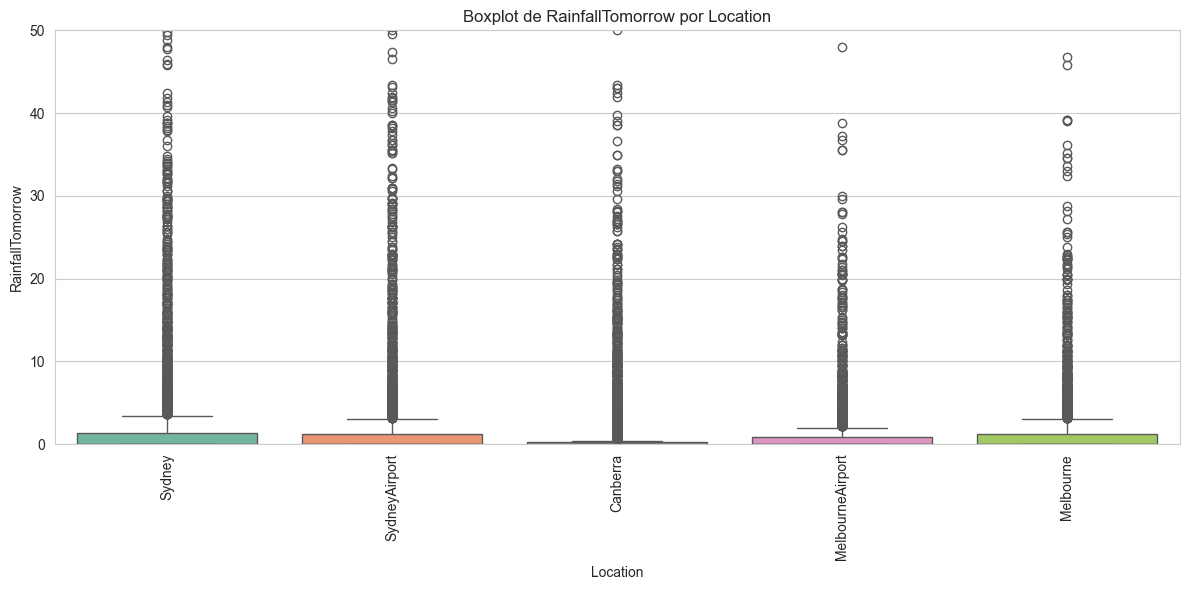

In [25]:
plt.figure(figsize=(12, 6))
# Crea el boxplot
sns.boxplot(x='Location', y='RainfallTomorrow', data=data, palette='Set2')

# Ajusta las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)  # Rotar las etiquetas para mayor claridad

# Personaliza el título y los ejes
plt.title('Boxplot de RainfallTomorrow por Location')
plt.xlabel('Location')
plt.ylabel('RainfallTomorrow')
plt.ylim(0, 50)  # Ajusta los valores 0 y 50 según tus necesidades

# Muestra el gráfico
plt.tight_layout()
plt.show()

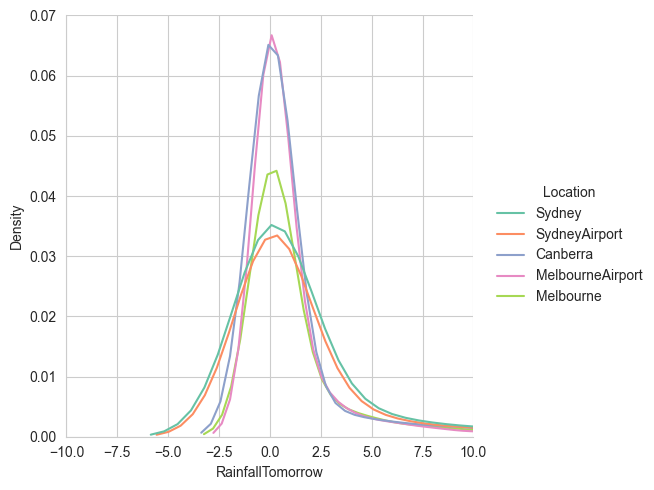

In [26]:
sns.displot(hue='Location', x='RainfallTomorrow', data=data, palette='Set2', kind='kde')

# Establece los límites del eje x para acercarte a la moda
plt.xlim(-10, 10)  # Ajusta los valores 0 y 10 según tu necesidad

# Muestra el gráfico
plt.show()

Por el momento tiene pinta de que me quedaria con los datos de el aeropuerto de Sydney el de Melbourne y Canberra

In [27]:
"""all_cols = [ 'surface_covered_in_m2', 'surface_uncovered_in_m2', 'balcon', 'lavadero',
       'parrilla', 'piscina', 'pileta', 'sum', 'terraza', 'luminoso', 'garage',
       'cochera', 'amenities', 'jardin', 'quincho', 'patio', 'gimnasio',
       'vestidor', 'solarium', 'ambientes', 'place_new_Palermo', 'place_new_Recoleta'
       ,'lat','lon']"""

""""corr = data[ ['price_aprox_usd'] + all_cols ].corr()
corr.style.background_gradient (cmap = 'coolwarm')
"""

'"corr = data[ [\'price_aprox_usd\'] + all_cols ].corr()\ncorr.style.background_gradient (cmap = \'coolwarm\')\n'

In [28]:
data.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  \
30167       30176  2008-02-01   Sydney     19.5     22.4      15.6   
30168       30177  2008-02-02   Sydney     19.5     25.6       6.0   
30169       30178  2008-02-03   Sydney     21.6     24.5       6.6   
30170       30179  2008-02-04   Sydney     20.2     22.8      18.8   
30171       30180  2008-02-05   Sydney     19.7     25.7      77.4   

       Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Pressure9am  \
30167          6.2       0.0         NaN            NaN  ...      1017.6   
30168          3.4       2.7         NaN            NaN  ...      1017.9   
30169          2.4       0.1         NaN            NaN  ...      1016.7   
30170          2.2       0.0         NaN            NaN  ...      1014.2   
30171          NaN       0.0         NaN            NaN  ...      1008.3   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
30167      1017.4       8.0       8.0     20.7     20.9        Yes   
30168      1016.4       7.0       7.0     22.4     24.8        Yes   
30169      1015.6       7.0       8.0     23.5     23.0        Yes   
30170      1011.8       8.0       8.0     21.4     20.9        Yes   
30171      1004.8       8.0       8.0     22.5     25.5        Yes   

       RainTomorrow  RainfallTomorrow  Flag  
30167           Yes               6.0    si  
30168           Yes               6.6    si  
30169           Yes              18.8    si  
30170           Yes              77.4    si  
30171           Yes               1.6    si  

[5 rows x 26 columns]

A continuación creamos una función que busca en el dataset la las tempraturas del año anterior, que coinciden con cierto día y también del día anterior y posterior a este.

In [29]:
def promedio(fech, data, variable):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = fecha - pd.DateOffset(years=1)
    fecha_anio_anterior_dia_desp = fecha_anio_anterior + pd.DateOffset(days=1)
    fecha_anio_anterior_dia_ant = fecha_anio_anterior - pd.DateOffset(days=1)
    temperaturas = data[(data['Date'] == fecha_anio_anterior) |
                      (data['Date'] == fecha_anio_anterior_dia_desp) |
                      (data['Date'] == fecha_anio_anterior_dia_ant)][variable]

<Axes: >

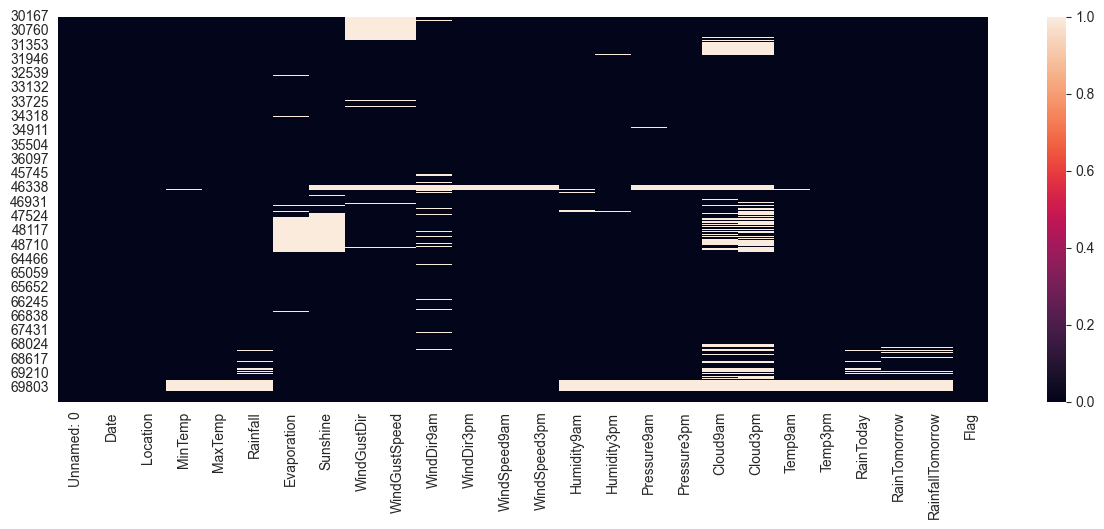

In [30]:
datos = data
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(datos.isnull())

El gráfico anterior de mapa de calor proporciona una visualización rápida y efectiva de la ubicación de los valores nulos en el DataFrame. Esto nos lleva a pensar, ¿qué columnas vamos a imputar?

Columnas a Inputar

In [31]:
Inputar = ['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'Rainfall', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow']

In [32]:
data = data.sort_values(by='Date')

La decisión tomada para rellenar los datos nulos es rellenar los mismos con el valor de la fecha de la misma fecha del año pasado, si es que existe, ya que también podría ser nulo.
A continuación se encuentra el código que realice esta modificación de los datos 

In [33]:
for variable in Inputar:
#Rellenamos los valores nulos con el valor de la fecha del año pasado si existe
    data[variable] = data[variable].fillna(data[variable].shift())


¿Mejoraron la cantidad de nulos por columna? Lo vemos en el gráfico que se muestra a continuación

<Axes: >

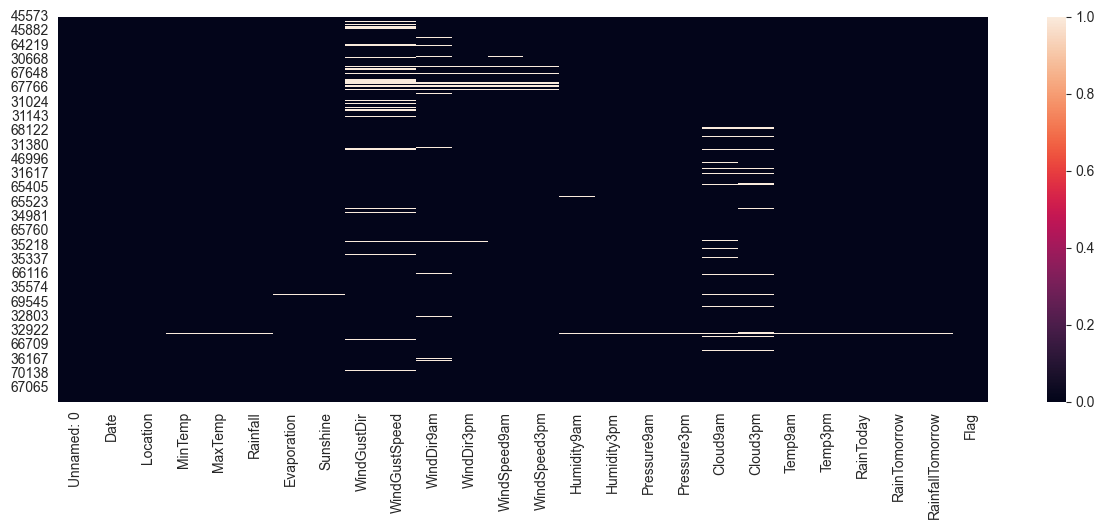

In [34]:
datos = data
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(datos.isnull())


Comprando este gráfico con el realizado antes de empezar a realziar el tratamiento de los datos nulos, podemos ver que ha mejorado significatiavamente.
Analizamos a continaución en profundidad los resultados obtenidos.

In [35]:
#Porcentaje de nulos por columna

data.isnull().sum() / data.shape[0]

Unnamed: 0          0.000000
Date                0.000000
Location            0.000000
MinTemp             0.001189
MaxTemp             0.001189
Rainfall            0.001501
Evaporation         0.006944
Sunshine            0.005567
WindGustDir         0.091142
WindGustSpeed       0.091017
WindDir9am          0.043476
WindDir3pm          0.018141
WindSpeed9am        0.016327
WindSpeed3pm        0.015576
Humidity9am         0.001439
Humidity3pm         0.001251
Pressure9am         0.001564
Pressure3pm         0.001439
Cloud9am            0.024459
Cloud3pm            0.031465
Temp9am             0.001189
Temp3pm             0.001189
RainToday           0.001501
RainTomorrow        0.001814
RainfallTomorrow    0.001814
Flag                0.000000
dtype: float64

Consideramos que el porcentaje de nulos ya es lo suficiente bajo, para que los pocos nulos que quedan no afecten el resultado final la decisión que tomamos es eliminarlos, como se puede ver en el código que desarrollamos a continuación. 

In [36]:
data.dropna(inplace=True)

In [37]:
#Chequeamos que efectivamento no haya más nulos
print(data.isnull().sum() / data.shape[0])

Unnamed: 0          0.0
Date                0.0
Location            0.0
MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustDir         0.0
WindGustSpeed       0.0
WindDir9am          0.0
WindDir3pm          0.0
WindSpeed9am        0.0
WindSpeed3pm        0.0
Humidity9am         0.0
Humidity3pm         0.0
Pressure9am         0.0
Pressure3pm         0.0
Cloud9am            0.0
Cloud3pm            0.0
Temp9am             0.0
Temp3pm             0.0
RainToday           0.0
RainTomorrow        0.0
RainfallTomorrow    0.0
Flag                0.0
dtype: float64


# Transformación de variables categóricas

In [38]:
#Cantidad de registros para trabajar en la regresión
print("Tenemos ", data.shape[0], " registros para trabajar la regresión")

Tenemos  13446  registros para trabajar la regresión


A continuación seleccionamos las columnas del dataset que tienen tipos de datos "object". Estas columnas de tipo "object" suelen contener datos categóricos que pueden necesitar ser convertidos en variables dummy (variables binarias que representan la presencia o ausencia de una categoría) para ser utilizadas en los disitntos modelos.

In [39]:
#Esto es para saber a cual sacarle variables Dummies
columnas_object = data.select_dtypes(include=['object'])


Creamos variables dummy a partir de las columnas categóricas especificadas en la lista palabrasObject y luego las agregamos al DataFrame.

In [40]:
palabrasObject = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Flag"]
data = pd.get_dummies(data, columns = palabrasObject, drop_first=True)

Descompones la columana 'Date' en sus componentes indivudales, es decir: año, mes, día agregamos esta columna y una más que guarda el día de la semana, la función day_of_week devuelve 0 para lunes, 1 para el domingo y así sucesivamente hasta el domingo.

In [41]:
data['Date'] = pd.to_datetime(data['Date'])
data['Año'] = data['Date'].dt.year
data['Mes'] = data['Date'].dt.month
data['Dia'] = data['Date'].dt.day
data['Dia_Semana'] = data['Date'].dt.day_of_week

Eliminamos la fecha del dataframe

In [42]:
data.drop(columns= "Date", inplace=True, axis= 1)

In [43]:
anios = data.Año.unique() 
print(f"Cantidad de años que tenemos datos: {len(anios)}. Estos son: {anios}",) 

Cantidad de años que tenemos datos: 11. Estos son: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


# Análisis

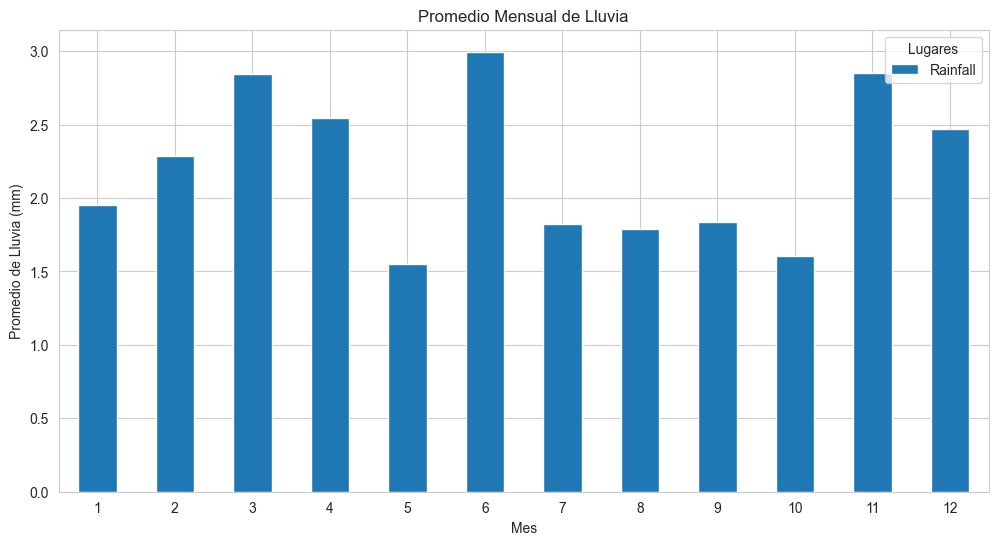

In [44]:
#Graficamos el promedio de lluvia por mes, consdierando todos los años del dataset
promedio_mensual = data.groupby(['Mes'])['Rainfall'].mean()
promedio_mensual.plot(kind='bar', figsize=(12, 6))
plt.title('Promedio Mensual de Lluvia')
plt.xlabel('Mes')
plt.ylabel('Promedio de Lluvia (mm)')
plt.xticks(rotation=0)
plt.legend(title='Lugares', loc='upper right')
plt.show()

De dicho gráfico podemos observar que los meses con mayor cantidad de lluvia son junio, marzo y noviembre.

In [45]:
data.head()

Unnamed: 0  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
45573       45587      8.0     24.3       0.0          3.4       6.3   
45574       45588     14.0     26.9       3.6          4.4       9.7   
45575       45589     13.7     23.4       3.6          5.8       3.3   
45576       45590     13.3     15.5      39.8          7.2       9.1   
45577       45591      7.6     16.1       2.8          5.6      10.6   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
45573           30.0           6.0          20.0         68.0  ...   
45574           39.0           4.0          17.0         80.0  ...   
45575           85.0           6.0           6.0         82.0  ...   
45576           54.0          30.0          24.0         62.0  ...   
45577           50.0          20.0          28.0         68.0  ...   

       WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
45573          False         False           False           False   
45574          False          True           False           False   
45575          False         False           False           False   
45576          False          True           False           False   
45577          False         False           False           False   

       RainToday_Yes  RainTomorrow_Yes   Año  Mes  Dia  Dia_Semana  
45573          False              True  2007   11    1           3  
45574           True              True  2007   11    2           4  
45575           True              True  2007   11    3           5  
45576           True              True  2007   11    4           6  
45577           True             False  2007   11    5           0  

[5 rows x 73 columns]

In [46]:
#Elimamos la primera columna para que no afecte análisis posterioreas
data = data.drop(columns = ['Unnamed: 0',], axis= 1)

'allColumns' contendrá todos los nombres de las columnas del dataset, excepto la columna "RainfallTomorrow". Y lo transformamos a una lista, que nos será útil para el posterior análisis.

In [47]:
allColumns = data.drop(columns = ["RainfallTomorrow"], axis= 1).columns
allColumns = allColumns.tolist()
allColumns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Sydney',
 'Location_SydneyAirport',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3p

# Matriz de correlación y elección de datos a analizar

Con el fin de identificar patrones de correlación en los datos, calculamos la matriz de corrlación entre todas las columnas del dataset, incluyendo la columna 'RainfallTomorrow', aplicamos un estilo de color utilizando la plata "coolwarm".
Vale aclarar que el coeficiente de correlación lo aplicamos entre la columna 'RainfallTomorrow' y las restantes columnas.
En este caso vamos analizar lo siguiente:
- Si el coeficiente de correlación es cercano a 1, indica una correlación positiva fuerte, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
- Si el coeficiente de correlación es cercano a -1, indica una correlación negativa fuerte, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.
- Si el coeficiente de correlación es cercano a 0, indica que no hay una correlación lineal fuerte entre las dos variables.

In [48]:
corr = data[["RainfallTomorrow"] + allColumns].corr()
corr.style.background_gradient(cmap = 'coolwarm')

Recorriendo la matriz anterior y obsevando los valores del coeficiente de correlación vemos que no en la mayoría de los casos los coeficientes son cercanos a 0, en algunos pocos casos es cercano a 0.5

Volvemos a graficar la matriz pero ordenado las columnas de de mayor a menor coeficiente de correlación para esto tomamos el valor absoluto del coeficiente.

In [49]:
#Calculamos los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

#Ordenamos los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)

order = corr_with_target_abs.index
corr_ordered = corr.loc[order, order]

corr_ordered.style.background_gradient(cmap = 'coolwarm')


In [50]:

# Ordena las columnas según su correlación con "RainfallTomorrow"
sorted_columns = corr["RainfallTomorrow"].sort_values(ascending=False).index
corr_sorted = corr.reindex(sorted_columns)[sorted_columns]

# Crea un mapa de calor con el mapa de colores "coolwarm"



In [51]:
corr = data[["RainfallTomorrow"] + allColumns].corr()

#Calculamos los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

#Ordenamos los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)
order = corr_with_target_abs.index

#Obtenemos las top 15 variables con mayor aporte
top_15_variables = order[1:16]  # Excluimos la variable "RainfallTomorrow" en sí misma

features = top_15_variables.tolist()
print(features)


['RainTomorrow_Yes', 'Humidity3pm', 'Sunshine', 'Rainfall', 'Cloud3pm', 'RainToday_Yes', 'Humidity9am', 'Cloud9am', 'WindGustSpeed', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Location_Sydney', 'Temp9am']


Armamos un nuevo data set que solo contiene a esas columnas

In [52]:
data_new = data[features]


Separamos nuestro dataset en la variable independiente y las variables dependientes.
La variable dependiente es 'RailfallTomorrow' y las variables dependientes todas las demás columnas.

In [53]:
X = data_new
y = data['RainfallTomorrow']


In [54]:
#¿Cuántas columnas tiene X? Es decir, ¿cuántas variables independientes tenemos?
len(X.columns)

15

In [55]:
#PARTE NUEVA


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

In [57]:
X_train.shape

(10756, 15)

In [58]:
y_train.shape

(10756, 1)

In [59]:
X_train.columns

Index(['RainTomorrow_Yes', 'Humidity3pm', 'Sunshine', 'Rainfall', 'Cloud3pm',
       'RainToday_Yes', 'Humidity9am', 'Cloud9am', 'WindGustSpeed', 'MinTemp',
       'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Location_Sydney', 'Temp9am'],
      dtype='object')

# Regresión Lineal

In [60]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar. 
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos, recomendamos su uso aunque NO es estrictamente necesario, simplemente pueden usar los componentes por separado.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

El método fit que se utiliza a continuación ajusta el modelo a los datos de entrenamiento, lo que significa que el modelo aprenderá de los ejemplos de entrenamiento y ajustará sus parámetros internos de manera que sea capaz de hacer predicciones en función de esos datos.

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [62]:
lr = model.fit(X_train, y_train)

In [63]:
model.steps[0]

('standardscaler', StandardScaler())

In [64]:
model.steps[1][1].n_features_in_

15

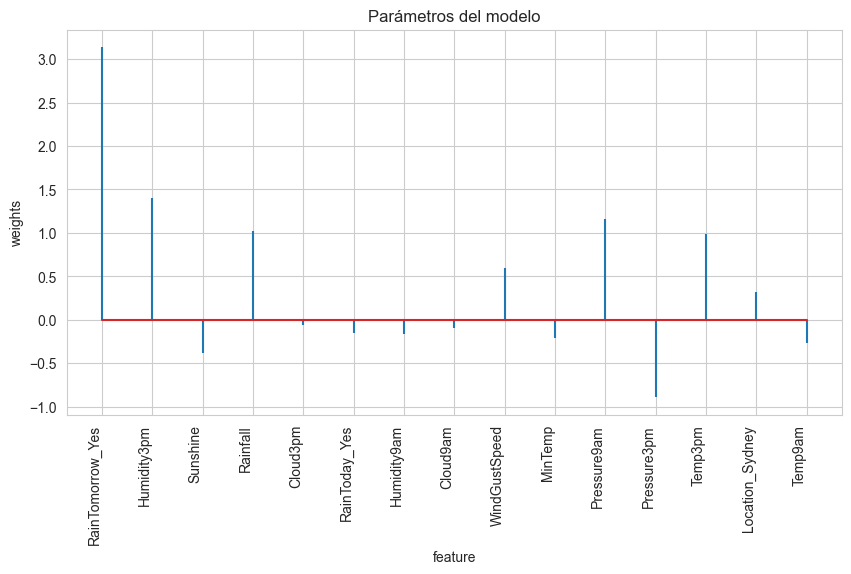

In [65]:
#Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

En el gráfico de tallo anterior podemos ver como influyen las distintas características a las predicciones. Podemos observar que la variable que más impacto tiene es 'RainTomorrow_Yes', seguida por 'Humidity3pm' y 'Pressure9pm'

In [66]:
# Predicciones
y_pred = model.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_pred.shape, y_test.shape

((2690, 1), (2690, 1))

Calculamos algunas métricas para evaluar el modelo

In [67]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)

print(f"El error (rmse) de test es: ",rmse_ols.round(4))

El error (rmse) de test es:  5.4098


Un RMSE de 5.4098 indica que, en promedio, las predicciones del modelo están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4098 unidades en la misma escala que los valores objetivo, es decir mm. Esto significa que, en promedio, las predicciones del modelo tienden a estar a unos 5.4098 mm de distancia de las etiquetas reales. Que en contextos de lluvia es relativamente poco.

In [68]:
rl_R2 = metrics.r2_score(y_test, y_pred)
print('El coeficien de regresión es: ',rl_R2.round(4))

El coeficien de regresión es:  0.3742


Un R-cuadrado de 0.3743 indica que el modelo de regresión lineal no es muy bueno para explicar la variación en los valores objetivo en el conjunto de prueba y que podría ser necesario considerar otros modelos o mejoras en el proceso de modelado para obtener un mejor ajuste a los datos.

In [69]:
(y_test - y_pred).shape

(2690, 1)

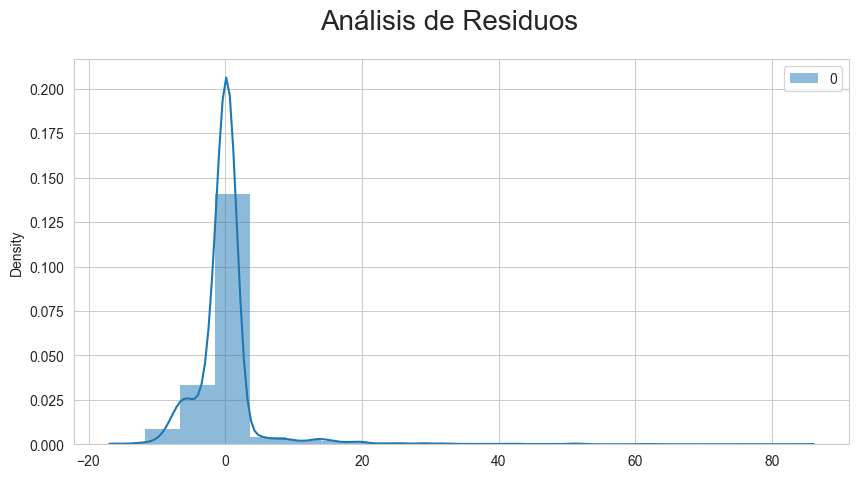

In [70]:
fig = plt.figure(figsize=(10,5))
  
sns.histplot((y_test - y_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)    
plt.show()

Vemos que el histograma muestra una distribución asimétrica, con una cola larga a la derecha, puede indicar que el modelo no está capturando completamente la variabilidad en los datos. Esto puede sugerir que el modelo tiene sesgos o que hay patrones no lineales en los datos que no se están teniendo en cuenta.
De todos modos se puede observar que los residuos tienen una distribución alrededor de cero, lo que significa que, en promedio, no debería haber un sesgo sistemático en las predicciones del modelo.

C:\Users\garci\AppData\Local\Temp\ipykernel_19928\3270093346.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(y_test,100*(y_test-y_pred)/y_test)


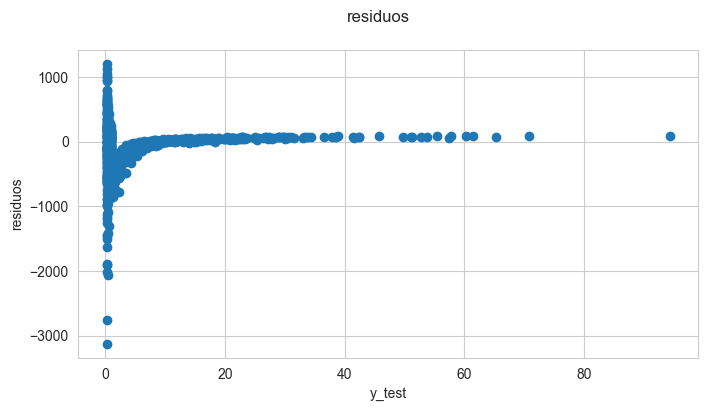

In [71]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

# Ridge

In [72]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(), 
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

In [73]:
ridge = modelo.fit(X_train, y_train)

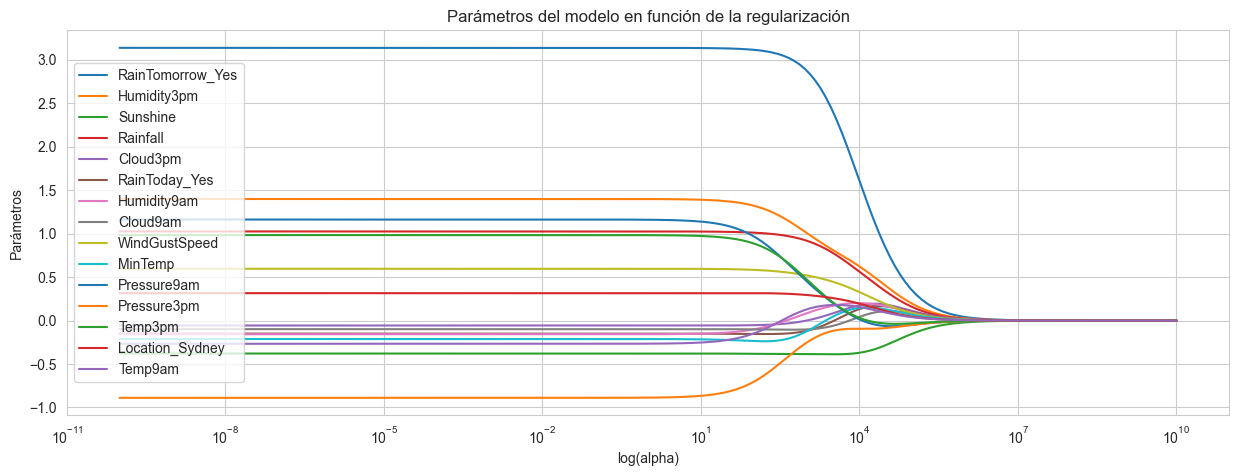

In [74]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

En el gráfico anterior podemos observar que a medida que alpha aumenta, la regularización se vuelve más fuerte, y los coeficientes tienden a disminuir hacia cero. Esto es una característica de Ridge, que ayuda a evitar el sobreajuste al penalizar coeficientes más grandes.

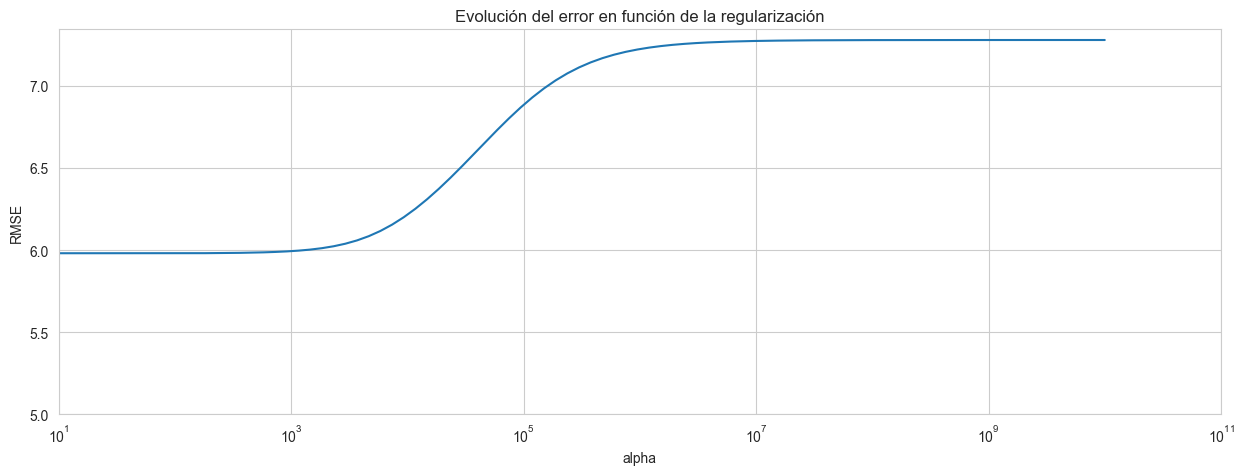

In [75]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_xlim([10,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

A medida que alpha aumenta (la regularización se vuelve más fuerte), el RMSE de CV tiende a aumentar. Esto se debe a que la regularización penaliza coeficientes más grandes, lo que puede hacer que el modelo se ajuste menos a los datos de entrenamiento.

In [76]:
# Mejor valor alpha encontrado
alfa=mod.alpha_.round(4)
print(f"Mejor valor de alpha encontrado:", alfa)

Mejor valor de alpha encontrado: 36.1234


Este es el valor específico de alpha que minimiza el error (RMSE) en el conjunto de validación cruzada. Indica cuánta regularización se debe aplicar al modelo para obtener un equilibrio óptimo entre el ajuste a los datos y la capacidad de generalización.

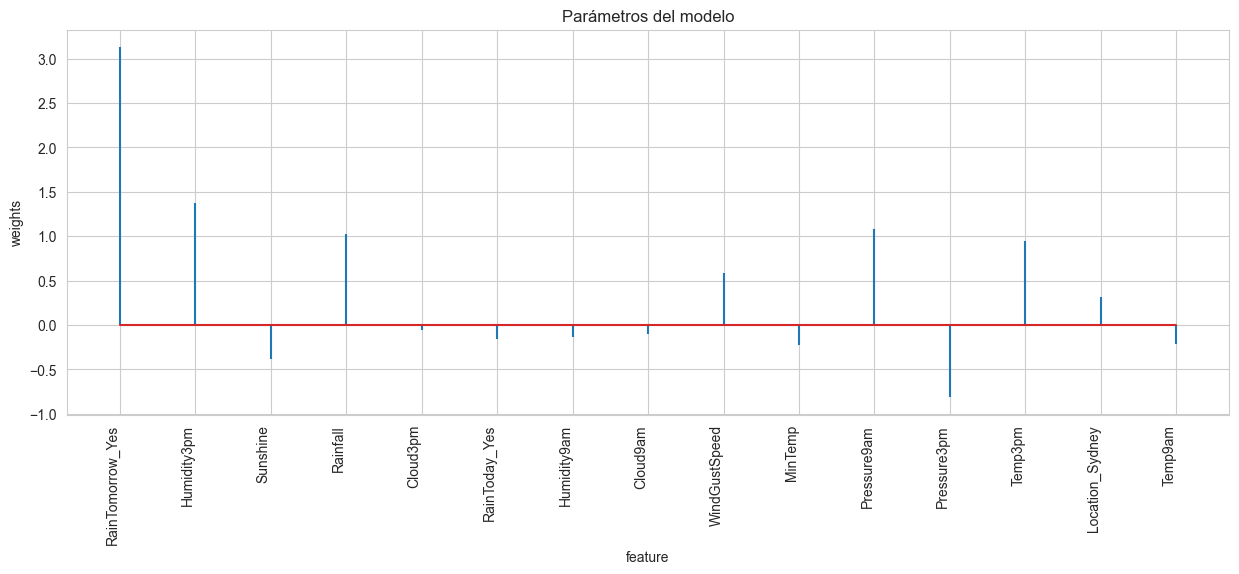

In [77]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [78]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [79]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print("El error (rmse) de test es: ", rmse_ridge.round(4))

El error (rmse) de test es:  5.4094


El error (RMSE) de test es: 5.4093" significa que, en promedio, las predicciones del modelo Ridge están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4093 unidades en la misma escala que los valores objetivo. Esto sugiere que el modelo Ridge tiene un rendimiento muy similar al modelo de regresión lineal utilizado anteriormente (5.4098).

In [80]:
ridge_R2 = metrics.r2_score(y_test, y_pred)
print("El coeficiente de regresión es de: ", ridge_R2.round(4))

El coeficiente de regresión es de:  0.3743


El valor obtenido indica que el modelo Ridge no es muy bueno para explicar la variación en los valores objetivo en el conjunto de prueba y que podría ser necesario considerar otros modelos o mejoras en el proceso de modelado para obtener un mejor ajuste a los datos.

Dado que el R-cuadrado del modelo Ridge (0.3742) es muy similar al R-cuadrado del modelo de regresión lineal (0.3742), parece que ambos modelos tienen un rendimiento bastante similar en términos de su capacidad para explicar la variabilidad en los datos.

# Lasso Regression

In [81]:
modelo = make_pipeline(StandardScaler(), 
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
lasso = modelo.fit(X_train, y_train)

c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


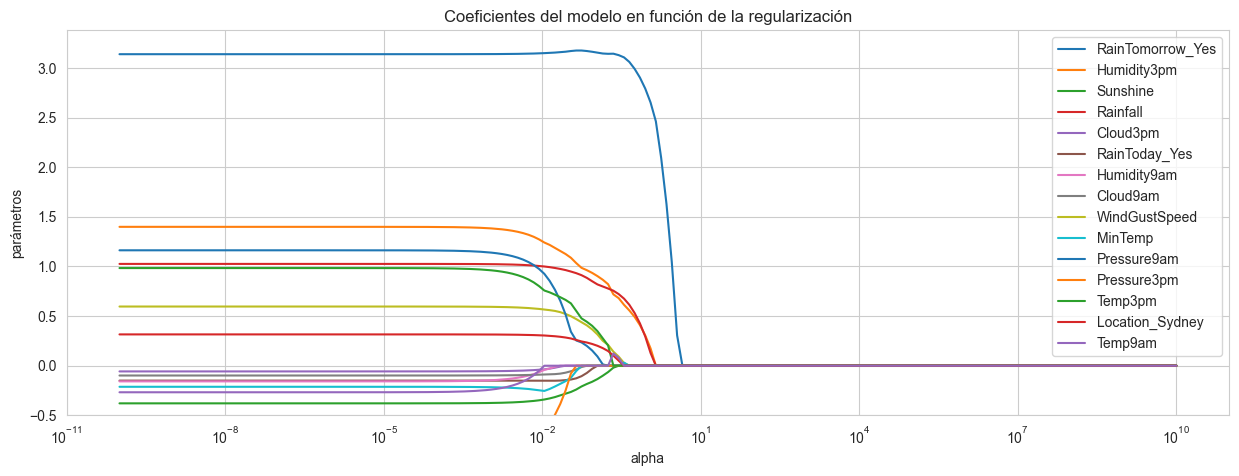

In [83]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

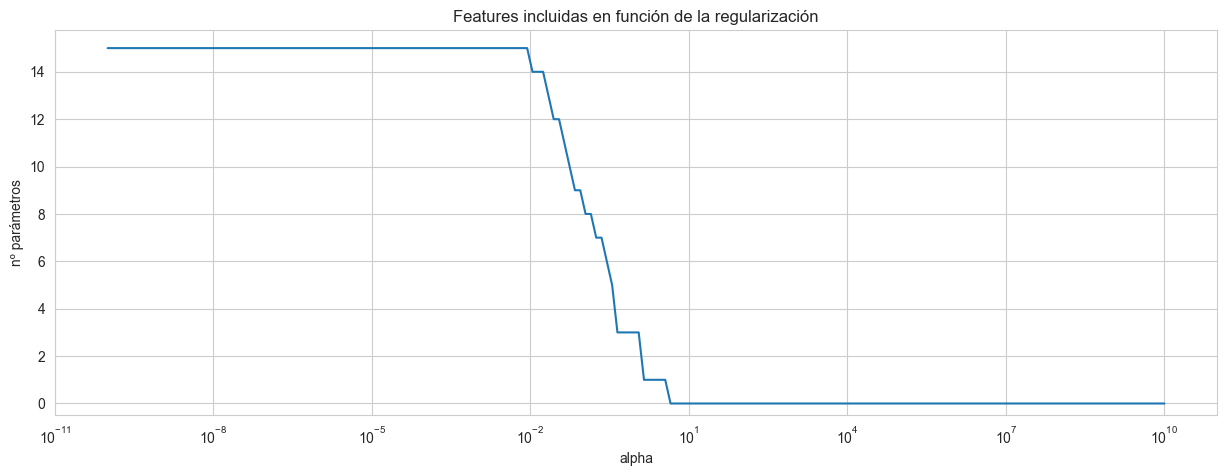

In [84]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

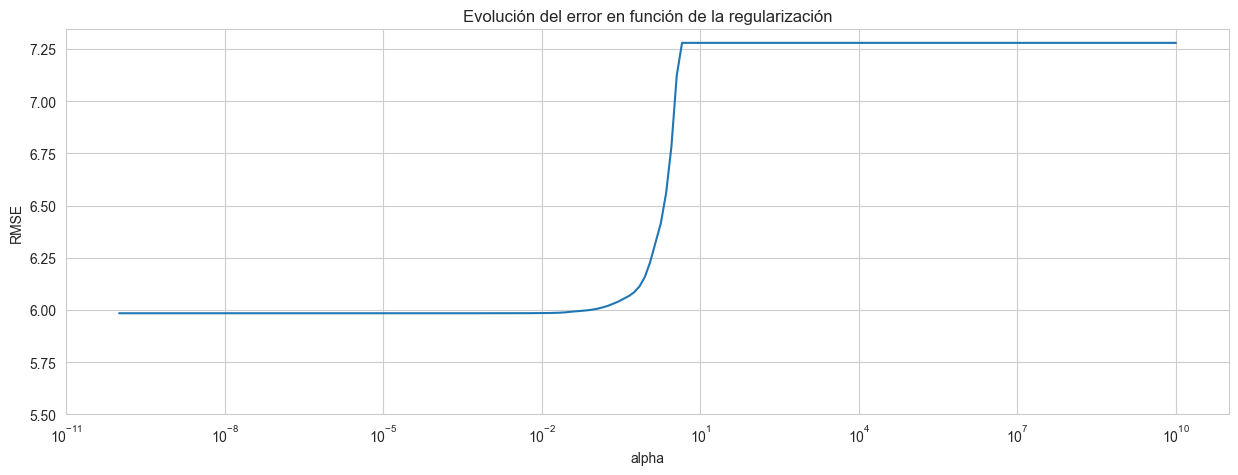

In [85]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5.5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [86]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [87]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
0   RainTomorrow_Yes  3.138790
1        Humidity3pm  1.399298
2           Sunshine -0.379168
3           Rainfall  1.025845
4           Cloud3pm -0.057392
5      RainToday_Yes -0.149999
6        Humidity9am -0.157745
7           Cloud9am -0.098642
8      WindGustSpeed  0.596350
9            MinTemp -0.212260
10       Pressure9am  1.162947
11       Pressure3pm -0.889533
12           Temp3pm  0.983901
13   Location_Sydney  0.315533
14           Temp9am -0.267447

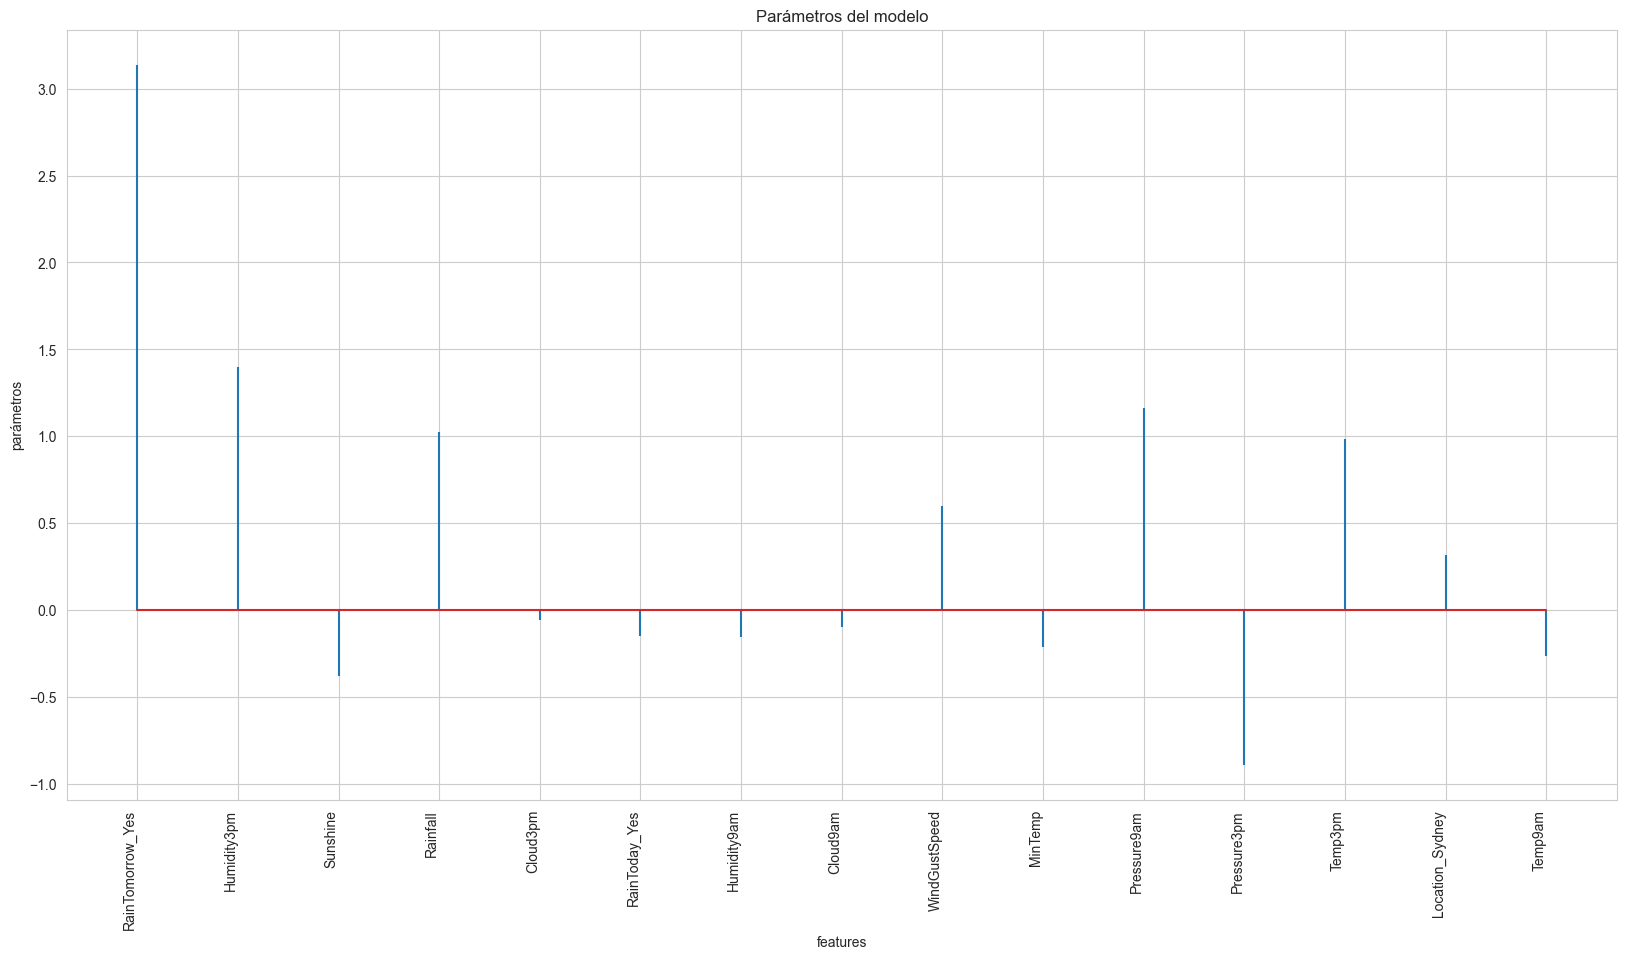

In [88]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [89]:
y_pred = modelo.predict(X_test)

In [90]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 5.409826907604193


In [91]:
lasso_R2 = metrics.r2_score(y_test, y_pred)
lasso_R2

0.3741674690395531

In [92]:
#Esto lo coreemos para ver como nos estan dando los valores --> borrarlo posteriormente
print(rl_R2)
print(ridge_R2)
print(lasso_R2)
print(rmse_ols)
print(rmse_lasso)
print(rmse_ridge)

0.3741674690309891
0.37425649154126883
0.3741674690395531
5.409826907641208
5.409826907604193
5.409442129385655


# ElasticNet

In [93]:
modelo = make_pipeline(StandardScaler(), 
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255463.3109391151, tolerance: 51.09266219163243
  model = cd_fast.enet_coordinate_descen

c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171349.73028864956, tolerance: 51.09266219163243
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171349.72917293286, tolerance: 51.09266219163243
  model = cd_fast.

In [94]:
#como lo anterior no se puede mostrar, lo mostramos de la siguiente forma
import pprint

# Imprimir el modelo detalladamente
pprint.pprint(mod)



ElasticNetCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.289890...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
             cv=10, l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99])


In [95]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv


l1_ratio   mod.alphas_     mse_cv   rmse_cv
122       0.00  5.478901e-03  35.807609  5.983946
123       0.00  4.347013e-03  35.807684  5.983952
121       0.00  6.905514e-03  35.807729  5.983956
124       0.00  3.448962e-03  35.807865  5.983967
323       0.10  4.347013e-03  35.808054  5.983983
...        ...           ...        ...       ...
1034      0.95  3.827494e+06  52.980657  7.278781
1035      0.95  3.036771e+06  52.980657  7.278781
1036      0.95  2.409404e+06  52.980657  7.278781
1030      0.95  9.658832e+06  52.980657  7.278781
1051      0.95  7.488104e+04  52.980657  7.278781

[1400 rows x 4 columns]

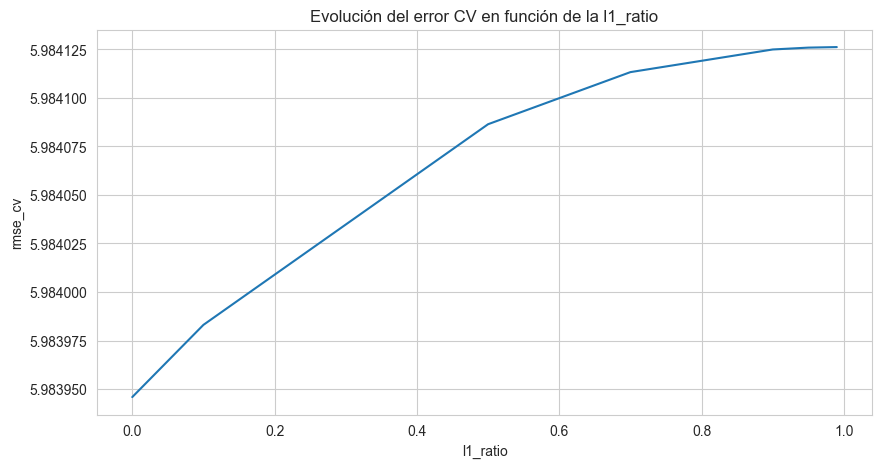

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

El gráfico muestra una curva que representa cómo cambia el RMSE de CV a medida que varía el valor de l1_ratio. Esta curva te permite identificar el valor óptimo de l1_ratio que minimiza el RMSE de CV y, por lo tanto, proporciona el mejor rendimiento del modelo.

In [97]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: ", mod.alpha_.round(4))
print(f"Mejor valor de l1_ratio encontrado:", mod.l1_ratio_)

Mejor valor de alpha encontrado:  0.0055
Mejor valor de l1_ratio encontrado: 0.0


In [98]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

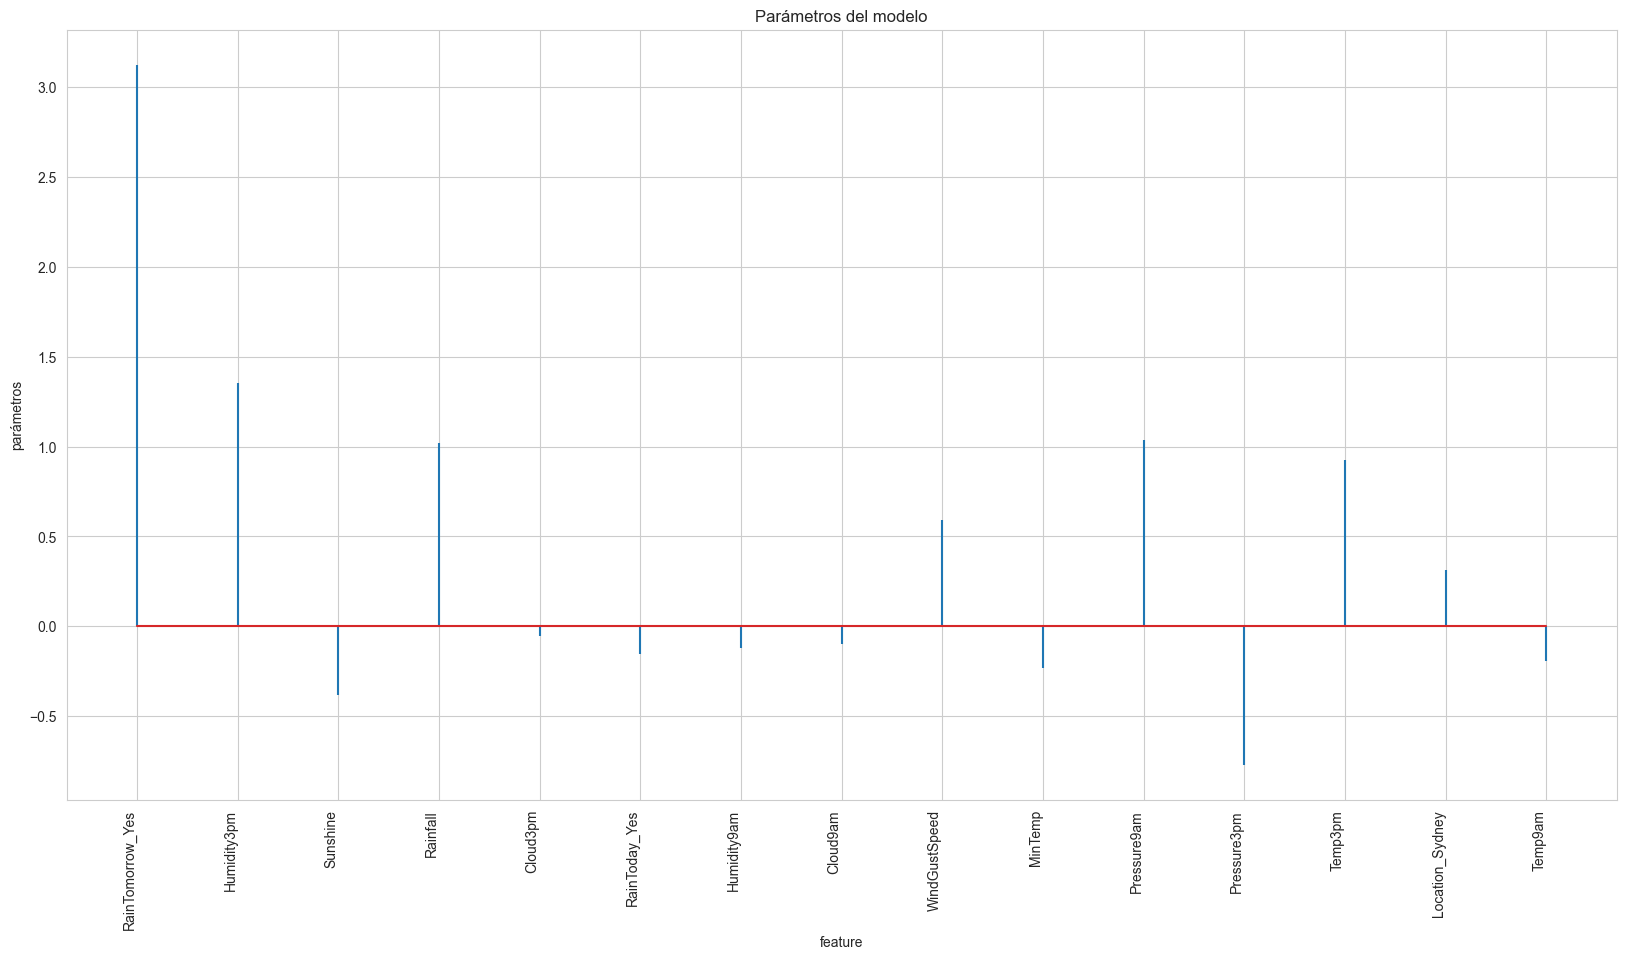

In [99]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [100]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [101]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 5.40929123674118


In [102]:
elasticnet_R2 = metrics.r2_score(y_test, y_pred)
elasticnet_R2.round(4)

0.3743

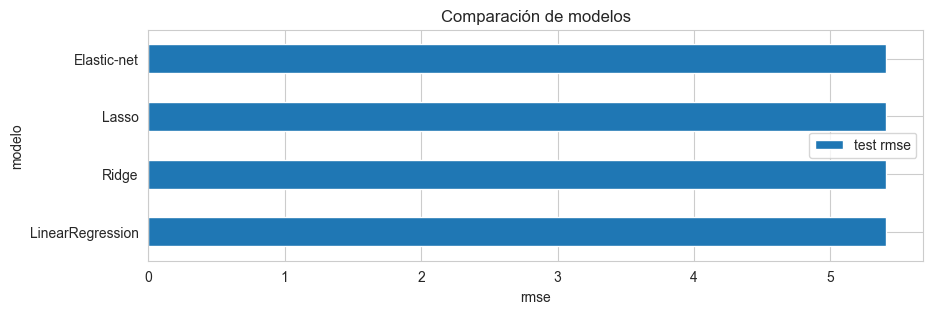

In [103]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [104]:
print([rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic])

[5.409826907641208, 5.409442129385655, 5.409826907604193, 5.40929123674118]


In [105]:
print([rl_R2, lasso_R2, ridge_R2, elasticnet_R2])

[0.3741674690309891, 0.3741674690395531, 0.37425649154126883, 0.3742914004186001]


Los valores de R2 que proporcionas para diferentes modelos de regresión lineal son bastante similares. Aquí tienes algunas conclusiones basadas en estos valores:

En general, todos los modelos tienen un R2 que oscila alrededor de 0.374. Esto significa que aproximadamente el 37.4% de la variabilidad en los datos de nuestros modelos se pueden explicar mediante la regresión.

Tambien los valores de R2 son prácticamente idénticos, lo que dice que estos modelos tienen un rendimiento muy similar en términos de la cantidad de variabilidad explicada.

Sin embargo, hay que tener en cuenta que los valores de R2 son relativamente bajos, lo que indica que el modelo no explica una gran parte de la variabilidad en los datos.

# Gradiente descendiente


In [106]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [107]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [108]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [109]:
data_new.head()

RainTomorrow_Yes  Humidity3pm  Sunshine  Rainfall  Cloud3pm  \
45573              True         29.0       6.3       0.0       7.0   
45574              True         36.0       9.7       3.6       3.0   
45575              True         69.0       3.3       3.6       7.0   
45576              True         56.0       9.1      39.8       7.0   
45577             False         49.0      10.6       2.8       7.0   

       RainToday_Yes  Humidity9am  Cloud9am  WindGustSpeed  MinTemp  \
45573          False         68.0       7.0           30.0      8.0   
45574           True         80.0       5.0           39.0     14.0   
45575           True         82.0       8.0           85.0     13.7   
45576           True         62.0       2.0           54.0     13.3   
45577           True         68.0       7.0           50.0      7.6   

       Pressure9am  Pressure3pm  Temp3pm  Location_Sydney  Temp9am  
45573       1019.7       1015.0     23.6            False     14.4  
45574       1012.4       1008.4     25.7            False     17.5  
45575       1009.5       1007.2     20.2            False     15.4  
45576       1005.5       1007.0     14.1            False     13.5  
45577       1018.3       1018.5     15.4            False     11.1

Para este modelo decidimos comparar con la primera columna

In [110]:
# X = data_new['RainTomorrow_Yes']
# y = data['RainfallTomorrow']
X,y = data_new['RainTomorrow_Yes'].values.reshape(-1,1),data['RainfallTomorrow'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

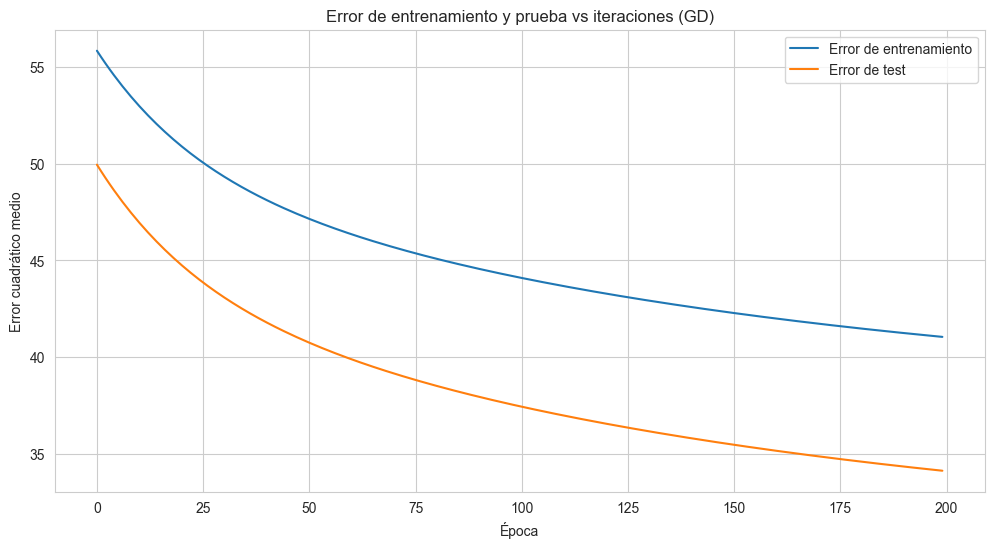

array([[1.21052909],
       [5.01294436]])

In [111]:
gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=200)

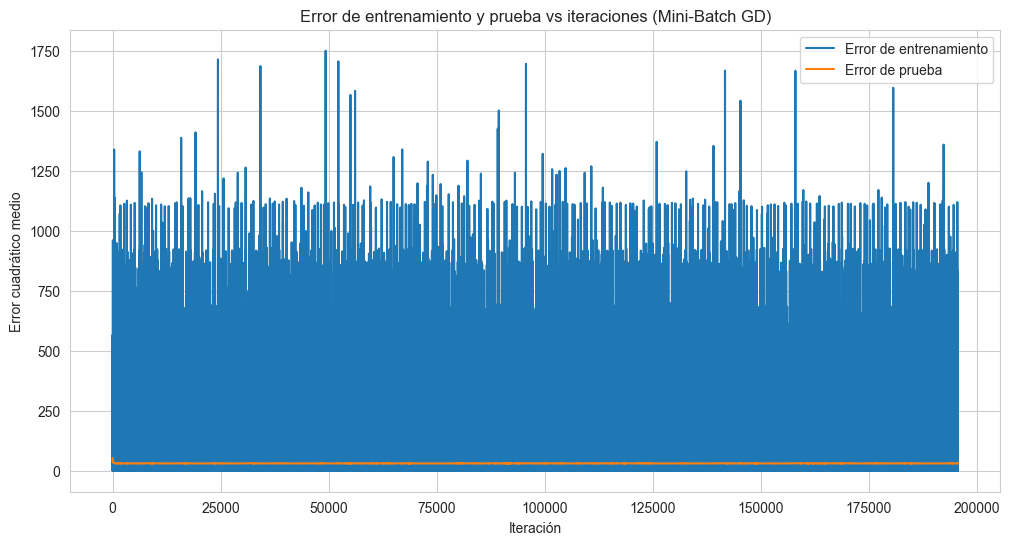

array([[-9.53323034e-04],
       [ 8.82996892e+00]])

In [112]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, epochs=200)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data_new,
                                             data['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10756, 15), (2690, 15), (10756, 1), (2690, 1))

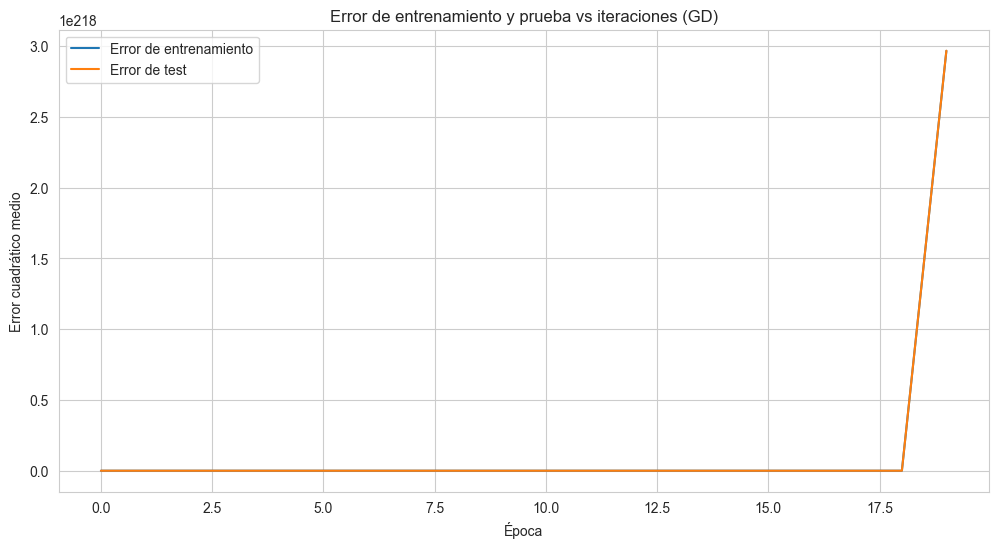

array([[3.4443425118606125e+108],
       [8.108044551452235e+107],
       [1.7635467178821388e+110],
       [2.3732884656250856e+109],
       [7.643599904111772e+108],
       [1.6275646006086117e+109],
       [8.155382299543773e+107],
       [2.3516961936055364e+110],
       [1.643077469080079e+109],
       [1.5441878399556607e+110],
       [4.0618080977102115e+109],
       [3.507170649365302e+111],
       [3.4996336290510305e+111],
       [6.976178882518934e+109],
       [5.4765450433813354e+107],
       [5.406585834164992e+109]], dtype=object)

In [115]:
gradient_descent(X_train, y_train, X_test, y_test, epochs=20, lr=0.1)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

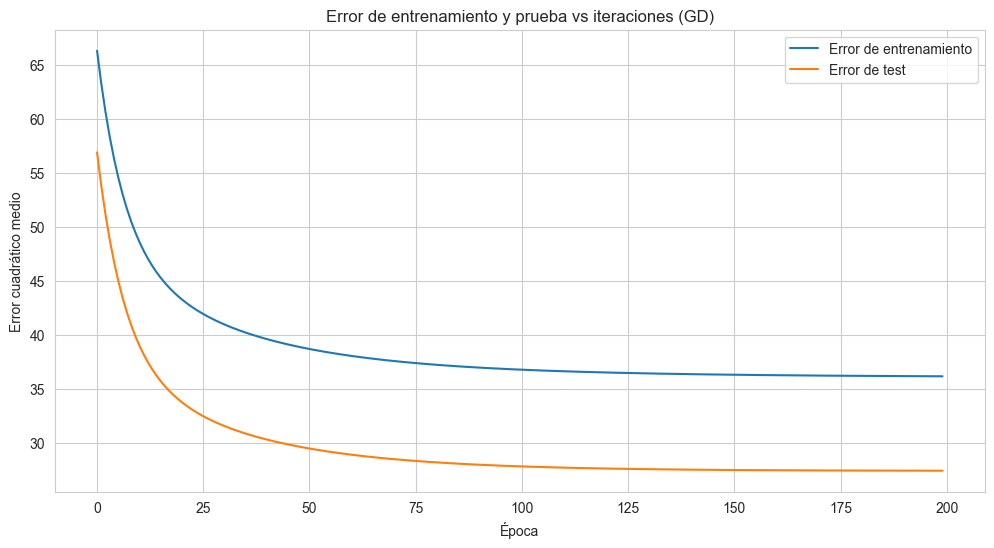

array([[ 2.22489313],
       [ 3.19119209],
       [ 1.36937296],
       [-0.17073638],
       [ 0.78044359],
       [-0.0046308 ],
       [ 0.1129568 ],
       [-0.09840187],
       [ 0.10554903],
       [ 0.49629502],
       [-0.52255586],
       [ 0.75310996],
       [-0.5442376 ],
       [ 0.99978535],
       [ 0.43138542],
       [ 0.04524236]])

In [117]:
gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=200, lr=0.01)

In [118]:
#Comentamos esta linea porque nos da error
# stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=20, lr=0.8)

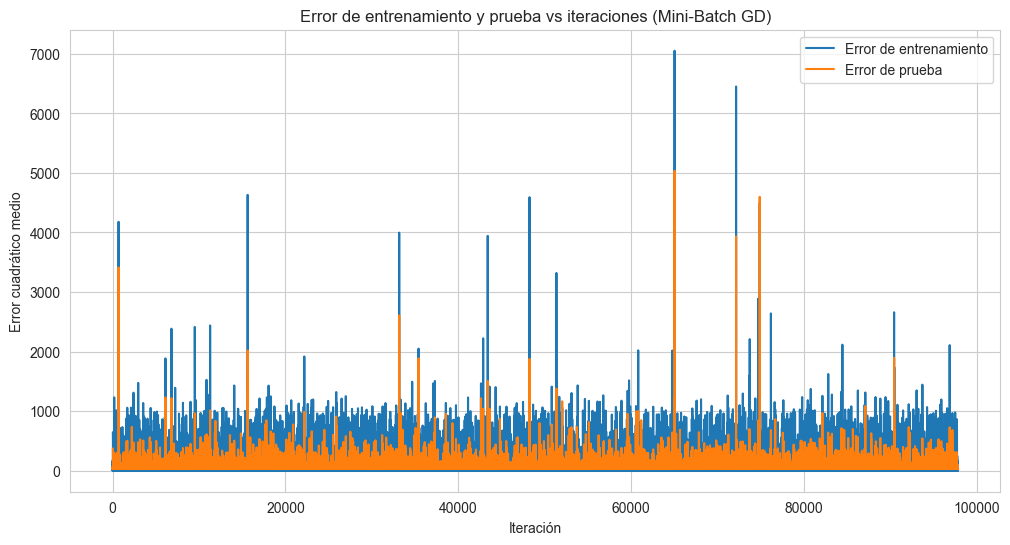

array([[ 2.19731301],
       [ 2.8553683 ],
       [ 1.78632775],
       [-0.30919981],
       [ 1.34720078],
       [ 0.34990629],
       [ 0.09686819],
       [ 0.51152256],
       [ 0.19037416],
       [ 0.49683657],
       [-0.458995  ],
       [ 0.05574402],
       [-1.2975359 ],
       [ 2.23924584],
       [ 1.08883006],
       [ 0.42344251]])

In [119]:
mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=100, lr=0.1)

## Implementar un modelo base para clasificación y uno para regresión.


Para regresion elegiremos prediccion por media o mediana y para clasificacion un random classifier

In [137]:
def Mean_Pred(data):
    target = data["Rainfall"]
    prediction_result = target.mean()
    return prediction_result

def Median_Pred(data):
    target = data["Rainfall"]
    prediction_result = target.median()
    return prediction_result

mean_pred = Mean_Pred(data)
median_pred = Median_Pred(data)

In [132]:
print(f"Segun el modelo simple de media, la prediccion de lluvia para mañana es de: {mean_pred} mm. \nSegun el modelo simple de mediana , la prediccion de lluvia para mañana es de: {median_pred} mm.")

Segun el modelo simple de media, la prediccion de lluvia para mañana es de: 2.211036739550796 mm. 
Segun el modelo simple de mediana , la prediccion de lluvia para mañana es de: 0.0 mm.


Volvemos a calcular con los datos con lluvia mayores a 0

In [138]:
data_1 = data[data["Rainfall"] > 0]

In [139]:
median_pred_1 = Median_Pred(data_1)
media_pred_1 = Mean_Pred(data_1)


In [140]:
print(f"Segun el modelo simple de media, la prediccion de lluvia para mañana es de: {media_pred_1} mm. \nSegun el modelo simple de mediana , la prediccion de lluvia para mañana es de: {median_pred_1} mm.")

Segun el modelo simple de media, la prediccion de lluvia para mañana es de: 6.009621993127148 mm. 
Segun el modelo simple de mediana , la prediccion de lluvia para mañana es de: 2.2 mm.


Vamos con el random classifier

In [143]:
possible_answers = data["RainTomorrow_Yes"].unique().tolist()

In [145]:
import random

In [150]:
def random_predict(answers):
    eleccion = random.choice(answers)
    if eleccion:
        respuesta = "Mañana va llover."
    else:
        respuesta = "Mañana no va a llover."
    return respuesta
    

In [153]:
print(random_predict(possible_answers))

Mañana va llover.


Correr esta celda para chequear que efectivamente es random

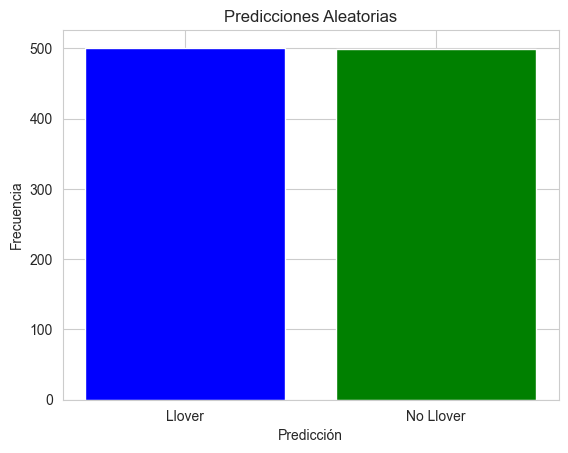

In [164]:
predicciones = [random_predict(possible_answers) for _ in range(1000)]

# Contar la cantidad de veces que se predijo "Mañana va llover."
contador_llover = predicciones.count("Mañana va llover.")

# Crear un gráfico de barras
etiquetas = ["Llover", "No Llover"]
valores = [contador_llover, 1000 - contador_llover]

plt.bar(etiquetas, valores, color=['blue', 'green'])
plt.title('Predicciones Aleatorias')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()